###Actividad Semana 4 
###Análisis de Componentes Principales PCA 
####-----------------------------------------------------------------------------------------
####EQUIPO 68

Denisse Maria Ramirez Colmenero   - A01561497 

Emmanuel González Calitl  -    A01320739

####-----------------------------------------------------------------------------------------
Materia: Ciencia y Analitica de Datos 

Profesor titular: Jobish Vallikavungal Devassia

Profesor tutor: Orlando Figón Cruz

Fecha: 11 de Octubre de 2022



##PARTE 1 

In [2]:
import pandas as pd
import numpy as np 

In [3]:
clients = '/content/data_limpia.csv' #dataset limpio obtenido de la actividad anterior

In [5]:
clients_df = pd.read_csv(clients)
df = clients_df.copy() #copiar el dataframe con los datos originales limpios 
df.head(10)

ID  Credit_Amount  Gender  Education  Marital_Status   Age  Sep  Ago  Jul  \
0   1          20000     2.0        2.0             1.0  24.0  2.0  2.0 -1.0   
1   2         120000     2.0        2.0             2.0  26.0 -1.0  2.0 -1.0   
2   3          90000     2.0        2.0             2.0  34.0 -1.0 -1.0 -1.0   
3   4          50000     2.0        2.0             1.0  37.0 -1.0 -1.0 -1.0   
4   5          50000     1.0        2.0             1.0  57.0 -1.0 -1.0 -1.0   
5   6          50000     1.0        1.0             2.0  37.0 -1.0 -1.0 -1.0   
6   7         500000     1.0        1.0             2.0  29.0 -1.0 -1.0 -1.0   
7   8         100000     2.0        2.0             2.0  23.0 -1.0 -1.0 -1.0   
8   9         140000     2.0        3.0             1.0  28.0 -1.0 -1.0  2.0   
9  10          20000     1.0        3.0             2.0  35.0 -1.0 -1.0 -1.0   

   Jun  ...    Bs-Jun    Bs-May    Bs-Apr   Pp-Sep   Pp-Ago   Pp-Jul   Pp-Jun  \
0 -1.0  ...       0.0       0.0       0.0      0.0    689.0      0.0      0.0   
1 -1.0  ...    3272.0    3455.0    3261.0      0.0   1000.0   1000.0   1000.0   
2 -1.0  ...   14331.0   14948.0   15549.0   1518.0   1500.0   1000.0   1000.0   
3 -1.0  ...   28314.0   28959.0   29547.0   2000.0   2019.0   1200.0   1100.0   
4 -1.0  ...   20940.0   19146.0   19131.0   2000.0  36681.0  10000.0   9000.0   
5 -1.0  ...   19394.0   19619.0   20024.0   2500.0   1815.0    657.0   1000.0   
6 -1.0  ...  542653.0  483003.0  473944.0  55000.0  40000.0  38000.0  20239.0   
7 -1.0  ...     221.0    -159.0     567.0    380.0    601.0      0.0    581.0   
8 -1.0  ...   12211.0   11793.0    3719.0   3329.0      0.0    432.0   1000.0   
9 -1.0  ...       0.0   13007.0   13912.0      0.0      0.0      0.0  13007.0   

    Pp-May   Pp-Apr  Credible?  
0      0.0      0.0        1.0  
1      0.0   2000.0        1.0  
2   1000.0   5000.0        0.0  
3   1069.0   1000.0        0.0  
4    689.0    679.0        0.0  
5   1000.0    800.0        0.0  
6  13750.0  13770.0        0.0  
7   1687.0   1542.0        0.0  
8   1000.0   1000.0        0.0  
9   1122.0      0.0        0.0  

[10 rows x 25 columns]

In [6]:
df.shape #30000 filas, 25 columnas (variables)

(30000, 25)

In [7]:
df.info() #nos aseguramos que todas sean variables continuas para poder realizar el PCA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   Credit_Amount   30000 non-null  int64  
 2   Gender          30000 non-null  float64
 3   Education       30000 non-null  float64
 4   Marital_Status  30000 non-null  float64
 5   Age             30000 non-null  float64
 6   Sep             30000 non-null  float64
 7   Ago             30000 non-null  float64
 8   Jul             30000 non-null  float64
 9   Jun             30000 non-null  float64
 10  May             30000 non-null  float64
 11  Apr             30000 non-null  float64
 12  Bs-Sep          30000 non-null  float64
 13  Bs-Ago          30000 non-null  float64
 14  Bs-Jul          30000 non-null  float64
 15  Bs-Jun          30000 non-null  float64
 16  Bs-May          30000 non-null  float64
 17  Bs-Apr          30000 non-null 

In [8]:
df.drop(['ID','Gender','Education','Marital_Status', 'Sep','Ago','Jul','Jun','May','Apr'], axis=1, inplace=True)#eliminamos datos categóricos. 
df.corr() #correlacion entre todas las vairables. Valores de -1 a 1 

Credit_Amount       Age    Bs-Sep    Bs-Ago    Bs-Jul  \
Credit_Amount       1.000000  0.144662  0.285457  0.278330  0.283255   
Age                 0.144662  1.000000  0.056349  0.054349  0.053774   
Bs-Sep              0.285457  0.056349  1.000000  0.951480  0.892266   
Bs-Ago              0.278330  0.054349  0.951480  1.000000  0.928320   
Bs-Jul              0.283255  0.053774  0.892266  0.928320  1.000000   
Bs-Jun              0.293963  0.051431  0.860257  0.892470  0.923962   
Bs-May              0.295510  0.049384  0.829763  0.859767  0.883894   
Bs-Apr              0.290403  0.047698  0.802630  0.831577  0.853305   
Pp-Sep              0.195268  0.025969  0.140271  0.280366  0.244348   
Pp-Ago              0.178396  0.021791  0.099319  0.100817  0.316914   
Pp-Jul              0.210101  0.029219  0.156903  0.150718  0.130022   
Pp-Jun              0.203205  0.021354  0.158269  0.147368  0.143373   
Pp-May              0.217124  0.022777  0.167031  0.157952  0.179713   
Pp-Apr              0.219573  0.019507  0.179307  0.174219  0.182288   
Credible?          -0.153449  0.013818 -0.019588 -0.014135 -0.014032   

                 Bs-Jun    Bs-May    Bs-Apr    Pp-Sep    Pp-Ago    Pp-Jul  \
Credit_Amount  0.293963  0.295510  0.290403  0.195268  0.178396  0.210101   
Age            0.051431  0.049384  0.047698  0.025969  0.021791  0.029219   
Bs-Sep         0.860257  0.829763  0.802630  0.140271  0.099319  0.156903   
Bs-Ago         0.892470  0.859767  0.831577  0.280366  0.100817  0.150718   
Bs-Jul         0.923962  0.883894  0.853305  0.244348  0.316914  0.130022   
Bs-Jun         1.000000  0.940131  0.900918  0.233011  0.207529  0.300018   
Bs-May         0.940131  1.000000  0.946161  0.217053  0.181210  0.252299   
Bs-Apr         0.900918  0.946161  1.000000  0.199993  0.172633  0.233767   
Pp-Sep         0.233011  0.217053  0.199993  1.000000  0.285601  0.252206   
Pp-Ago         0.207529  0.181210  0.172633  0.285601  1.000000  0.244770   
Pp-Jul         0.300018  0.252299  0.233767  0.252206  0.244770  1.000000   
Pp-Jun         0.130154  0.293076  0.250210  0.199588  0.180096  0.216342   
Pp-May         0.160414  0.141555  0.307699  0.148469  0.180894  0.159173   
Pp-Apr         0.177591  0.164136  0.115451  0.185756  0.157617  0.162738   
Credible?     -0.010103 -0.006752 -0.005284 -0.072877 -0.058567 -0.056203   

                 Pp-Jun    Pp-May    Pp-Apr  Credible?  
Credit_Amount  0.203205  0.217124  0.219573  -0.153449  
Age            0.021354  0.022777  0.019507   0.013818  
Bs-Sep         0.158269  0.167031  0.179307  -0.019588  
Bs-Ago         0.147368  0.157952  0.174219  -0.014135  
Bs-Jul         0.143373  0.179713  0.182288  -0.014032  
Bs-Jun         0.130154  0.160414  0.177591  -0.010103  
Bs-May         0.293076  0.141555  0.164136  -0.006752  
Bs-Apr         0.250210  0.307699  0.115451  -0.005284  
Pp-Sep         0.199588  0.148469  0.185756  -0.072877  
Pp-Ago         0.180096  0.180894  0.157617  -0.058567  
Pp-Jul         0.216342  0.159173  0.162738  -0.056203  
Pp-Jun         1.000000  0.151825  0.157817  -0.056784  
Pp-May         0.151825  1.000000  0.154879  -0.055124  
Pp-Apr         0.157817  0.154879  1.000000  -0.053186  
Credible?     -0.056784 -0.055124 -0.053186   1.000000

In [9]:
df.shape #nos quedaron 15 columnas numericas 

(30000, 15)

Creamos un mapa de valor para observar que grado de correlación tienen cada variable respecto a otra. Los cuadros verde oscuro indican una correlación alta positiva (1, directamente proporcionales) y los blancos indican correlación alta negativa (-1, inversamente proporcionales). 0 = no hay correlación

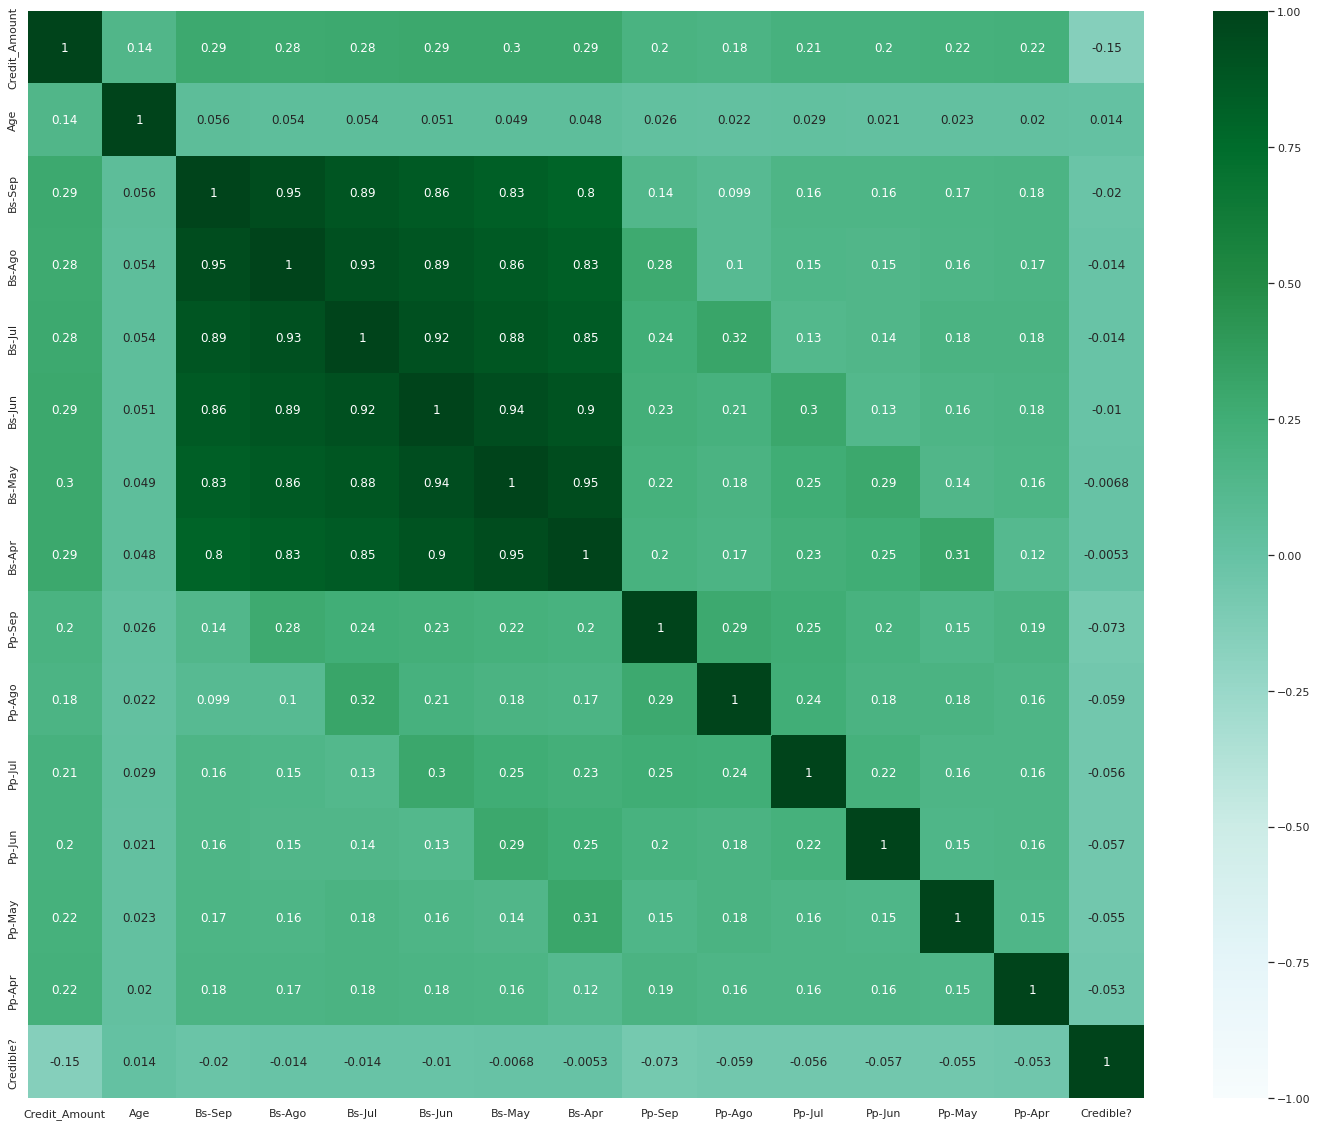

In [10]:
import seaborn as sns 
corrs = df.corr()
sns.set(rc = {'figure.figsize':(25,20)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

La idea de PCA, es reducir aquellas variables que esten muy correlacionadas, ya que significa que en el modelo existe información repetida que solo hace que el modelo sea más lento y ocupe espacio innecesario

Algunas correlaciones fuertes son:
Bs Sep - Bs Ago (0.95)
Bs Jun - Bs May (0.94) 
A continuación se obtiene las varianzas de algunas de ellas 

In [11]:
ndf = df[['Bs-May', 'Bs-Jun', 'Bs-Sep']] #lista de variables a analizar 
ndf.corr()

Bs-May    Bs-Jun    Bs-Sep
Bs-May  1.000000  0.940131  0.829763
Bs-Jun  0.940131  1.000000  0.860257
Bs-Sep  0.829763  0.860257  1.000000

Calculamos el promedio y la varianza de algunas de nuestras variables originales solo como ejemplo para observar que porcentaje de varianza de la varianza total aporta cada una.

In [12]:
df["Bs-May"].mean().round(2)

40324.49

In [13]:
df["Bs-Jun"].mean().round(2)

43275.65

In [14]:
df["Bs-Sep"].mean().round(2)

51236.86

In [15]:
ndf = df[['Bs-May', 'Bs-Jun', 'Bs-Sep']]
ndf.var().sum()

13255661488.108677

In [16]:
t= ndf.var().sum() 
varBM = df['Bs-May'].var()
varBJ = df['Bs-Jun'].var()
varBS = df['Bs-Sep'].var()

In [17]:
print('Total Varience \t\t\t:', t.round(2) )  #La varianza nos dice que tanta información hay en cada variable
print('Varianza de Amount of Bill Statement in May\t:', ((varBM/t)*100).round(2),'%' )
print('Varianza de Amount of Bill Statement in June \t:', ((varBJ/t)*100).round(2),'%' )
print('Varianza Amount of Bill Statement in September \t:', ((varBS/t)*100).round(2),'%' )

Total Varience 			: 13255661488.11
Varianza de Amount of Bill Statement in May	: 27.88 %
Varianza de Amount of Bill Statement in June 	: 31.22 %
Varianza Amount of Bill Statement in September 	: 40.9 %


En la celda anterior podemos observar que si por ejemplo, eliminaramos Bs-Sep eliminariamos casi un 41% de la varianza, por lo que tendríamos casi las mismas variables pero con mucho menos información y eso ocasiona que entonces nuestro conjunto de datos no sea optimo para analizarse ni para la creación de un futuro modelo para predicción. 

Una vez que limpiamos nuestro conjunto de datos de variables categóricas y que nos aseguramos que no contiene datos nulos, podemos comenzar con el análisis PCA 

In [18]:
from sklearn.preprocessing import StandardScaler #importamos la función StandardScaler con el fin de 
#que todos los datos esten en una misma escala y las variables con mayor escala no dominen al resto 

scaler = StandardScaler() 
scaled = scaler.fit_transform(df)
scaled[:5]

array([[-1.13672015, -1.24596794, -0.64272102, -0.64759431, -0.66820342,
        -0.67273076, -0.66332193, -0.6529115 , -0.34193064, -0.22714464,
        -0.29681292, -0.30814313, -0.31420111, -0.2934263 ,  1.87655989],
       [-0.3659805 , -1.02898001, -0.65943964, -0.66694258, -0.63946293,
        -0.62186671, -0.60648855, -0.59815115, -0.34193064, -0.21364658,
        -0.2400134 , -0.24430907, -0.31420111, -0.18092182,  1.87655989],
       [-0.59720239, -0.16102827, -0.29876024, -0.49408678, -0.48260878,
        -0.44995181, -0.41743326, -0.3918049 , -0.25027327, -0.1919455 ,
        -0.2400134 , -0.24430907, -0.2487466 , -0.01216511, -0.53289   ],
       [-0.90549825,  0.16445363, -0.05767805, -0.01345716,  0.0326723 ,
        -0.2325826 , -0.18695787, -0.15674348, -0.22116994, -0.16941979,
        -0.2286535 , -0.23792566, -0.24423024, -0.23717406, -0.53289   ],
       [-0.90549825,  2.33433298, -0.57883444, -0.61151126, -0.16137288,
        -0.34721326, -0.34837783, -0.33165417, 

In [19]:
scaled_df = pd.DataFrame(scaled,columns=df.columns)#convertir los valores escalados en un dataframe
scaled_df.head()

Credit_Amount       Age    Bs-Sep    Bs-Ago    Bs-Jul    Bs-Jun    Bs-May  \
0      -1.136720 -1.245968 -0.642721 -0.647594 -0.668203 -0.672731 -0.663322   
1      -0.365981 -1.028980 -0.659440 -0.666943 -0.639463 -0.621867 -0.606489   
2      -0.597202 -0.161028 -0.298760 -0.494087 -0.482609 -0.449952 -0.417433   
3      -0.905498  0.164454 -0.057678 -0.013457  0.032672 -0.232583 -0.186958   
4      -0.905498  2.334333 -0.578834 -0.611511 -0.161373 -0.347213 -0.348378   

     Bs-Apr    Pp-Sep    Pp-Ago    Pp-Jul    Pp-Jun    Pp-May    Pp-Apr  \
0 -0.652911 -0.341931 -0.227145 -0.296813 -0.308143 -0.314201 -0.293426   
1 -0.598151 -0.341931 -0.213647 -0.240013 -0.244309 -0.314201 -0.180922   
2 -0.391805 -0.250273 -0.191946 -0.240013 -0.244309 -0.248747 -0.012165   
3 -0.156743 -0.221170 -0.169420 -0.228653 -0.237926 -0.244230 -0.237174   
4 -0.331654 -0.221170  1.334985  0.271182  0.266363 -0.269103 -0.255231   

   Credible?  
0    1.87656  
1    1.87656  
2   -0.53289  
3   -0.53289  
4   -0.53289

In [20]:
import numpy as np
from sklearn.decomposition import PCA

In [21]:
pcs = PCA() #Aplicamos las descomposicion de las variables escaladas en componentes 

pcs_t = pcs.fit_transform(scaled_df)
pcs_t[:5]

array([[-1.99515463e+00, -9.24604390e-01,  1.75234059e+00,
         9.83458272e-01, -6.81247251e-01,  1.99841352e-01,
        -1.47445072e-01,  5.56840551e-02, -2.12711955e-02,
        -3.04339957e-01,  6.60390927e-02,  1.83928759e-02,
        -9.67158214e-03,  6.03632950e-03,  6.80141994e-03],
       [-1.77156748e+00, -6.00770976e-01,  1.28498661e+00,
         1.01743517e+00, -7.37062293e-01,  2.12914150e-01,
        -2.61166332e-01,  1.31180043e-01,  6.05019206e-02,
        -8.13890751e-01, -2.29181892e-02, -3.98354264e-03,
         5.35756429e-03, -6.27754488e-03, -2.53927093e-03],
       [-1.21462131e+00, -1.64516714e-01,  4.28832591e-02,
        -5.13856725e-01,  1.71465665e-01,  7.30822678e-02,
        -3.51067181e-02, -1.85212283e-02,  6.24817003e-02,
         4.56966797e-01, -3.33638074e-02,  1.11984626e-01,
        -7.81422204e-02, -4.06152778e-02, -5.61244155e-02],
       [-5.31806438e-01, -5.48972370e-01, -3.90013074e-02,
        -3.33494561e-01,  3.95948301e-01, -3.84253423

##PASO 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

En las siguientes celdas se obtiene el porcentaje de la varianza explicada por cada componente y el acumulado de varianza por cada componente 

In [22]:
pcsSummary_df = pd.DataFrame({ '%desviación estándar': np.sqrt(pcs.explained_variance_),
                             '% varianza individual': np.round(pcs.explained_variance_ratio_,5) * 100,
                            '% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100 })
pcsSummary_df

%desviación estándar  % varianza individual  % varianza acumulada
0               2.433311                 39.472             39.472047
1               1.323524                 11.678             51.149754
2               1.024786                  7.001             58.150766
3               1.000366                  6.671             64.822090
4               0.955902                  6.091             70.913540
5               0.939428                  5.883             76.796839
6               0.933781                  5.813             82.609625
7               0.882853                  5.196             87.805645
8               0.852090                  4.840             92.645871
9               0.823714                  4.523             97.169081
10              0.513763                  1.760             98.928707
11              0.266514                  0.474             99.402222
12              0.202648                  0.274             99.675988
13              0.159258                  0.169             99.845070
14              0.152448                  0.155            100.000000

In [23]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))] 
pcsSummary_df.index = pcs_labels
pcsSummary_df #damos nombre a los componentes principales 

%desviación estándar  % varianza individual  % varianza acumulada
PC1               2.433311                 39.472             39.472047
PC2               1.323524                 11.678             51.149754
PC3               1.024786                  7.001             58.150766
PC4               1.000366                  6.671             64.822090
PC5               0.955902                  6.091             70.913540
PC6               0.939428                  5.883             76.796839
PC7               0.933781                  5.813             82.609625
PC8               0.882853                  5.196             87.805645
PC9               0.852090                  4.840             92.645871
PC10              0.823714                  4.523             97.169081
PC11              0.513763                  1.760             98.928707
PC12              0.266514                  0.474             99.402222
PC13              0.202648                  0.274             99.675988
PC14              0.159258                  0.169             99.845070
PC15              0.152448                  0.155            100.000000

Los componentes es información proveniente de todas las variables del dataset. El análisis PCA mantiene el 100% de la información pero distribuida de forma diferente, en lugar de estar distribuida por las variables, esta distribuida por los PC. 

 Los componentes no esta correlacionados entre si y de esta forma es más fácil saber cuales son los componentes más importantes según la varianza acumulada. 


In [24]:
#Para averiguar si el PCA mantuvo el 100% de la información 
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total de las variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total de las variables originales:  15.000500016667221
Varianza total de los componentes:  15.000500016667212


In [25]:
pcsSummary_df

%desviación estándar  % varianza individual  % varianza acumulada
PC1               2.433311                 39.472             39.472047
PC2               1.323524                 11.678             51.149754
PC3               1.024786                  7.001             58.150766
PC4               1.000366                  6.671             64.822090
PC5               0.955902                  6.091             70.913540
PC6               0.939428                  5.883             76.796839
PC7               0.933781                  5.813             82.609625
PC8               0.882853                  5.196             87.805645
PC9               0.852090                  4.840             92.645871
PC10              0.823714                  4.523             97.169081
PC11              0.513763                  1.760             98.928707
PC12              0.266514                  0.474             99.402222
PC13              0.202648                  0.274             99.675988
PC14              0.159258                  0.169             99.845070
PC15              0.152448                  0.155            100.000000

Al observar los resultados podemos darnos cuenta que cada uno de 15 componentes creados tienen un peso diferente de información en el conjunto de datos. Para determinar cuales son los PC más importantes se requiere seleccionar un porcentaje de peso que el equipo considere suficiente, en este caso nosotros consideramos un 92% de la variación del conjunto de datos, por lo que como se puede ver en la tabla anterior, el 92% de la variación es explicada por los primeros 9 componentes, es decir los 9 principales componentes. 

##PASO 2: Interprete cada componente principal en términos de las variables originales

Para obtener cuantas variables necesitamos para explicar ese 92% de variación calculamos su porcentaje de varianza individual y acumulada. 

In [31]:
pd.DataFrame({ #usamos los variables escaladas 
    "%Varianza": (scaled_df.var()/ (scaled_df.var().sum())) * 100,
    "%Varianza Acumulado": (scaled_df.var().cumsum() /(scaled_df.var().sum())) *100 })

%Varianza  %Varianza Acumulado
Credit_Amount   6.666667             6.666667
Age             6.666667            13.333333
Bs-Sep          6.666667            20.000000
Bs-Ago          6.666667            26.666667
Bs-Jul          6.666667            33.333333
Bs-Jun          6.666667            40.000000
Bs-May          6.666667            46.666667
Bs-Apr          6.666667            53.333333
Pp-Sep          6.666667            60.000000
Pp-Ago          6.666667            66.666667
Pp-Jul          6.666667            73.333333
Pp-Jun          6.666667            80.000000
Pp-May          6.666667            86.666667
Pp-Apr          6.666667            93.333333
Credible?       6.666667           100.000000

En la gráfica anterior podemos observar que para obtener un 92% de la varianza explicada tendriamos que usar 14 variables, es decir, solo una podríamos quitar, por lo que no estaríamos haciendo una reducción de datos eficiente.

In [27]:
componentes_df = pd.DataFrame(pcs.components_.round(3), columns=pcs_df.columns, index=scaled_df.columns)
#esta linea nos crea un dataframe con los pesos de cada variable en cada componente, las columnas son los componentes
#y el index son las variables escaladas 

componentes_df.iloc[:,:9]#solo imprimir los primeros 9 componentes 

PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9
Credit_Amount  0.166  0.033  0.372  0.383  0.388  0.391  0.388  0.380  0.135
Age            0.312  0.065 -0.186 -0.171 -0.126 -0.121 -0.108 -0.096  0.372
Bs-Sep        -0.417 -0.768 -0.054 -0.016  0.031  0.034  0.036  0.020  0.206
Bs-Ago        -0.113  0.497 -0.058 -0.040 -0.008  0.006  0.010 -0.000  0.101
Bs-Jul        -0.096  0.217 -0.038  0.032  0.068  0.075  0.028 -0.098  0.358
Bs-Jun         0.010 -0.030  0.037  0.075  0.116  0.023 -0.116 -0.148  0.198
Bs-May        -0.061  0.067 -0.047 -0.032  0.093  0.016 -0.089  0.076  0.041
Bs-Apr         0.092 -0.070  0.008 -0.033 -0.122  0.127 -0.007  0.010 -0.206
Pp-Sep         0.061 -0.017  0.009 -0.136  0.096  0.036  0.046 -0.008 -0.744
Pp-Ago        -0.814  0.316  0.022  0.009  0.003  0.025  0.028  0.052 -0.071
Pp-Jul        -0.023 -0.011  0.566  0.387  0.123 -0.206 -0.420 -0.489 -0.055
Pp-Jun        -0.006  0.000  0.416  0.039 -0.484 -0.523  0.068  0.514  0.048
Pp-May         0.015 -0.001 -0.433  0.344  0.496 -0.489 -0.250  0.339 -0.069
Pp-Apr        -0.001  0.000 -0.184  0.329 -0.085 -0.363  0.719 -0.427 -0.045
Credible?      0.003  0.001 -0.317  0.646 -0.528  0.345 -0.225  0.072 -0.085

La tabla anterior nos arroja todos los componentes principales en terminos de las variables originales, es decir, que peso tiene o como contribuye cada variable original en la creación de cada uno de los componentes. 

Como se puede observar en la tabla, los terminos tienen signos positivos y negativos, sin embargo solo nos interesa el valor absouluto, pues la magnitud del término indica que tanta importancia tiene cada variable en el cálculo de cada componente.

Para saber cual variable tiene mas peso en cada uno de nuestros componentes principales utilizamos la función .idxmax()

In [28]:
componentes_df.iloc[:,:9].abs().idxmax()#las variables originales que mayor aportación tienen para cada componente principal

PC1       Pp-Ago
PC2       Bs-Sep
PC3       Pp-Jul
PC4    Credible?
PC5    Credible?
PC6       Pp-Jun
PC7       Pp-Apr
PC8       Pp-Jun
PC9       Pp-Sep
dtype: object

In [30]:
componentes_df.iloc[:,:].abs().idxmin() #aquellas variables originales que aportan de menor medida a cada componente. 

PC1        Pp-Apr
PC2        Pp-Jun
PC3        Bs-Apr
PC4        Pp-Ago
PC5        Pp-Ago
PC6        Bs-Ago
PC7        Bs-Apr
PC8        Bs-Ago
PC9        Bs-May
PC10       Pp-Ago
PC11       Pp-Jun
PC12       Pp-May
PC13    Credible?
PC14    Credible?
PC15       Pp-Jun
dtype: object

Con esta tabla podemos concluir que las variables en general que tienen mas peso en el conjunto de datos son: credible? y Pp-Jun. Cada una contribuye de mayor manera en dos de los nueve componentes.


###PASO 3: Identifique valores atípicos 

In [33]:
df

Credit_Amount   Age    Bs-Sep    Bs-Ago    Bs-Jul   Bs-Jun   Bs-May  \
0              20000  24.0    3913.0    3102.0     689.0      0.0      0.0   
1             120000  26.0    2682.0    1725.0    2682.0   3272.0   3455.0   
2              90000  34.0   29239.0   14027.0   13559.0  14331.0  14948.0   
3              50000  37.0   46990.0   48233.0   49291.0  28314.0  28959.0   
4              50000  57.0    8617.0    5670.0   35835.0  20940.0  19146.0   
...              ...   ...       ...       ...       ...      ...      ...   
29995         220000  39.0  188948.0  192815.0  208365.0  88004.0  31237.0   
29996         150000  43.0    1683.0    1828.0    3502.0   8979.0   5190.0   
29997          30000  37.0    3565.0    3356.0    2758.0  20878.0  20582.0   
29998          80000  41.0   -1645.0   78379.0   76304.0  52774.0  11855.0   
29999          50000  46.0   47929.0   48905.0   49764.0  36535.0  32428.0   

        Bs-Apr   Pp-Sep   Pp-Ago   Pp-Jul  Pp-Jun   Pp-May  Pp-Apr  Credible?  
0          0.0      0.0    689.0      0.0     0.0      0.0     0.0        1.0  
1       3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0        1.0  
2      15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0        0.0  
3      29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0        0.0  
4      19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0        0.0  
...        ...      ...      ...      ...     ...      ...     ...        ...  
29995  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0        0.0  
29996      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0        0.0  
29997  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0        1.0  
29998  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0        1.0  
29999  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0        1.0  

[30000 rows x 15 columns]

In [32]:
#Gráfica interactiva sin variables categóricas sin escalamiento (MinMaxScaler):

import plotly.express as px
fig = px.box(df)
fig.show()

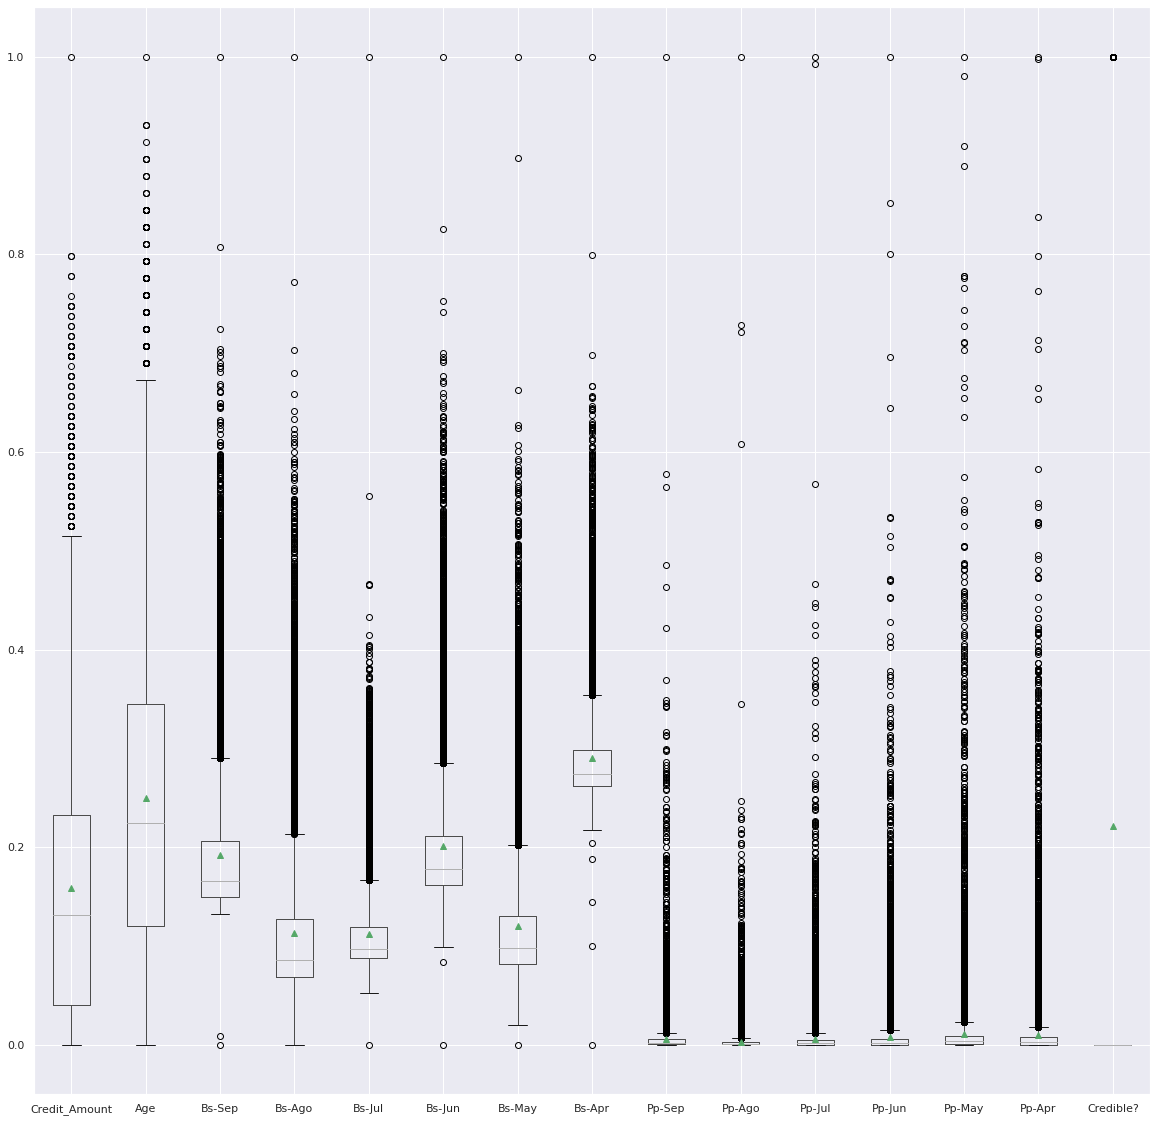

In [34]:
#Gráfica interactiva sin variables categóricas con escalamiento (MinMaxScaler):

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
pldf = pd.DataFrame(scaler.transform(df), columns = ['Credit_Amount', 'Age', 'Bs-Sep', 'Bs-Ago', 'Bs-Jul', 'Bs-Jun','Bs-May', 'Bs-Apr', 'Pp-Sep', 'Pp-Ago', 'Pp-Jul', 'Pp-Jun', 'Pp-May','Pp-Apr', 'Credible?'])
pldf.boxplot(figsize=(20,20), showmeans = True, )

Conforme a la gráficas de caja, se puede notar que en la mayoría de las variables numéricas existen demasiados casos atípicos, con su excepción del “Credit amount”y la edad (Age), esto se puede percibir porque estos datos salen fuera del tercer cuartil.
Se nota una fuerte tendencia a valores mucho más grandes positivos, al observar el abultamiento de estos.
Una consecuencia de estos valores extremos (atípicos) es que puede impactar de una manera grande y negativa en un ajuste lineal, ya que muestra bastante dispersión de un futuro modelo.

